In [3]:
import pandas as pd
import numpy as np
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 16.2 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [18]:
df_customer = pd.read_csv("customer_data.csv", nrows=5000)
df_sales = pd.read_csv("sales_data.csv",nrows = 5000)

In [19]:
df_sales.columns = df_sales.columns.str.lower().str.replace(" ", "_")
df_customer.columns = df_customer.columns.str.lower().str.replace(" ", "_")


In [20]:
df_sales.dropna(subset=['customer_id', 'category', 'quantity', 'price', 'invoice_date', 'shopping_mall'], inplace=True)
df_customer.dropna(subset=['customer_id', 'gender', 'age', 'payment_method'], inplace=True)


In [21]:
df_sales['quantity'] = pd.to_numeric(df_sales['quantity'], errors='coerce')
df_sales['price'] = pd.to_numeric(df_sales['price'], errors='coerce')


In [22]:
df_sales['invoice_date'] = pd.to_datetime(df_sales['invoice_date'], errors='coerce', dayfirst=True)

In [23]:
df_sales['category'] = df_sales['category'].str.title()
df_sales['shopping_mall'] = df_sales['shopping_mall'].str.title()
df_customer['gender'] = df_customer['gender'].str.capitalize()
df_customer['payment_method'] = df_customer['payment_method'].str.title()


In [24]:
df_sales.drop_duplicates(inplace=True)
df_customer.drop_duplicates(inplace=True)

In [25]:
df_sales['customer_id'] = df_sales['customer_id'].astype(str)
df_customer['customer_id'] = df_customer['customer_id'].astype(str)

In [26]:
unified_df = pd.merge(df_sales, df_customer, on='customer_id', how='left')

In [27]:
unified_df.to_csv("cleaned_combined_sales_data.csv", index=False)

In [28]:
print("Data Cleaning & Preprocessing Completed")
print(unified_df.info())

# Display first few rows
print(unified_df.head())

Data Cleaning & Preprocessing Completed
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      5000 non-null   object        
 1   customer_id     5000 non-null   object        
 2   category        5000 non-null   object        
 3   quantity        5000 non-null   int64         
 4   price           5000 non-null   float64       
 5   invoice_date    5000 non-null   datetime64[ns]
 6   shopping_mall   5000 non-null   object        
 7   gender          4995 non-null   object        
 8   age             4995 non-null   float64       
 9   payment_method  4995 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 390.8+ KB
None
  invoice_no customer_id  category  quantity    price invoice_date  \
0    I138884     C241288  Clothing         5  1500.40   2022-08-05   
1

In [5]:
df_customer

,customer_id,gender,age,payment_method
0,C241288,Female,28.0,Credit Card
1,C111565,Male,21.0,Debit Card
2,C266599,Male,20.0,Cash
3,C988172,Female,66.0,Credit Card
4,C189076,Female,53.0,Cash
...,...,...,...,...
4995,C281211,Female,54.0,Cash
4996,C143851,Female,40.0,Cash
4997,C752851,Male,34.0,Cash
4998,C222228,Male,39.0,Debit Card


In [6]:
df_sales

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall
0,I138884,C241288,Clothing,5,1500.40,05-08-2022,Kanyon
1,I317333,C111565,Shoes,3,1800.51,12-12-2021,Forum Istanbul
2,I127801,C266599,Clothing,1,300.08,09-11-2021,Metrocity
3,I173702,C988172,Shoes,5,3000.85,16-05-2021,Metropol AVM
4,I337046,C189076,Books,4,60.60,24-10-2021,Kanyon
...,...,...,...,...,...,...,...
4995,I936915,C281211,Clothing,3,900.24,03-12-2022,Zorlu Center
4996,I167850,C143851,Shoes,5,3000.85,22-12-2022,Metropol AVM
4997,I854893,C752851,Shoes,4,2400.68,27-01-2022,Mall of Istanbul
4998,I436005,C222228,Clothing,2,600.16,28-05-2022,Mall of Istanbul


In [7]:
unified_df = pd.merge(df_sales, df_customer, on='customer_id')

In [8]:
unified_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      5000 non-null   object 
 1   customer_id     5000 non-null   object 
 2   category        5000 non-null   object 
 3   quantity        5000 non-null   int64  
 4   price           5000 non-null   float64
 5   invoice_date    5000 non-null   object 
 6   shopping_mall   5000 non-null   object 
 7   gender          5000 non-null   object 
 8   age             4995 non-null   float64
 9   payment_method  5000 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 390.8+ KB


In [9]:
unified_df.to_csv("combined_sales_data.csv", index=False)
print("Combined sales data saved as file name `combined_sales_data`")

Combined sales data saved as file name `combined_sales_data`


In [10]:
unified_df.head()

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,gender,age,payment_method
0,I138884,C241288,Clothing,5,1500.40,05-08-2022,Kanyon,Female,28.0,Credit Card
1,I317333,C111565,Shoes,3,1800.51,12-12-2021,Forum Istanbul,Male,21.0,Debit Card
2,I127801,C266599,Clothing,1,300.08,09-11-2021,Metrocity,Male,20.0,Cash
3,I173702,C988172,Shoes,5,3000.85,16-05-2021,Metropol AVM,Female,66.0,Credit Card
4,I337046,C189076,Books,4,60.60,24-10-2021,Kanyon,Female,53.0,Cash


In [11]:
unified_df['SalesTotal'] = unified_df['quantity'] * unified_df['price']

total_sales = unified_df['SalesTotal'].sum()
print("\nTotal Sales Across All Transactions: ${:.2f}".format(total_sales))


Total Sales Across All Transactions: $12774869.20


In [12]:
# Sales by Shopping Mall
sales_by_category = unified_df.groupby('shopping_mall')['SalesTotal'].sum().sort_values(ascending=False)
print("\nSales by Shopping Mall:")
print(sales_by_category)


Sales by Shopping Mall:
shopping_mall
Mall of Istanbul     2834844.25
Kanyon               2554958.43
Metrocity            1662569.93
Metropol AVM         1312142.71
Istinye Park         1175621.77
Zorlu Center          780157.92
Forum Istanbul        662548.21
Viaport Outlet        616610.29
Emaar Square Mall     608116.57
Cevahir AVM           567299.12
Name: SalesTotal, dtype: float64


In [13]:
# Perform analysis: Product categories sold by Shopping malls
sales_by_country_category = unified_df.groupby(['shopping_mall', 'category'])['SalesTotal'].sum().reset_index()
print("\nProduct categories sold by Shopping malls:")
print(sales_by_country_category.head(60))


Product categories sold by Shopping malls:
        shopping_mall         category  SalesTotal
0         Cevahir AVM            Books     2757.30
1         Cevahir AVM         Clothing   203454.24
2         Cevahir AVM        Cosmetics    21265.18
3         Cevahir AVM  Food & Beverage     2133.84
4         Cevahir AVM            Shoes    91225.84
5         Cevahir AVM         Souvenir     1313.76
6         Cevahir AVM       Technology   237300.00
7         Cevahir AVM             Toys     7848.96
8   Emaar Square Mall            Books      848.40
9   Emaar Square Mall         Clothing   260169.36
10  Emaar Square Mall        Cosmetics    17565.12
11  Emaar Square Mall  Food & Beverage     2170.45
12  Emaar Square Mall            Shoes   190253.89
13  Emaar Square Mall         Souvenir     1067.43
14  Emaar Square Mall       Technology   130200.00
15  Emaar Square Mall             Toys     5841.92
16     Forum Istanbul            Books     2272.50
17     Forum Istanbul         Clothing

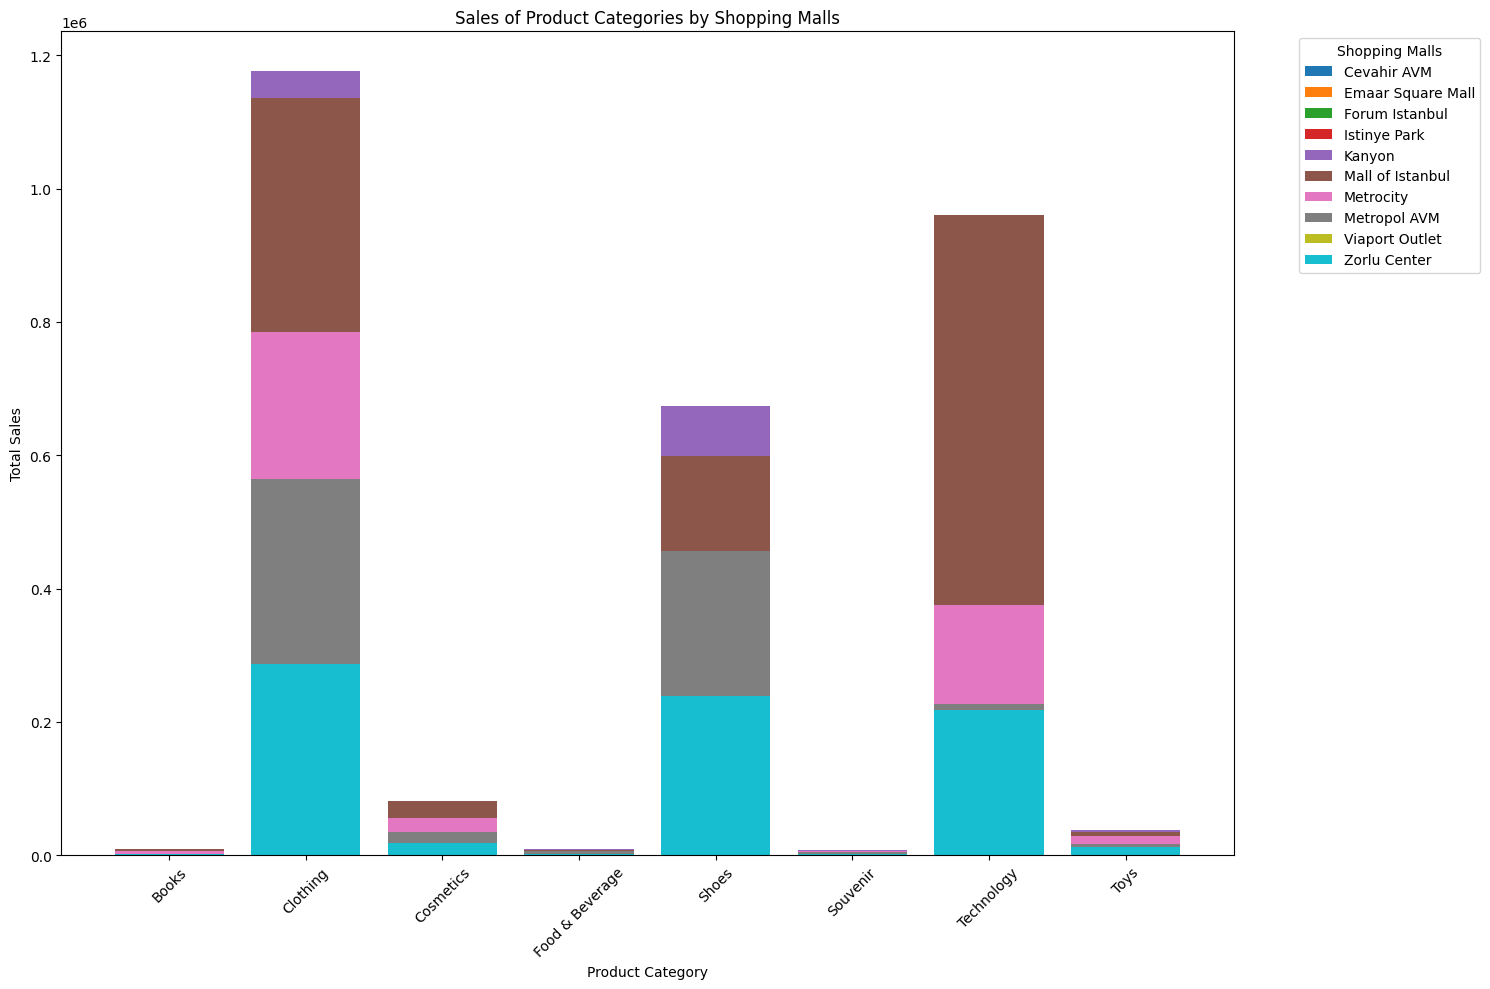

In [14]:
# Group by Shopping Mall and ProductCategory, sum SalesTotal
sales_by_country_category = unified_df.groupby(['shopping_mall', 'category'])['SalesTotal'].sum().reset_index()

# Plotting
plt.figure(figsize=(15, 10))
for shopmall in sales_by_country_category['shopping_mall'].unique():
    data_country = sales_by_country_category[sales_by_country_category['shopping_mall'] == shopmall]
    plt.bar(data_country['category'], data_country['SalesTotal'], label=shopmall)

plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Sales of Product Categories by Shopping Malls')
plt.xticks(rotation=45)
plt.legend(title='Shopping Malls', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

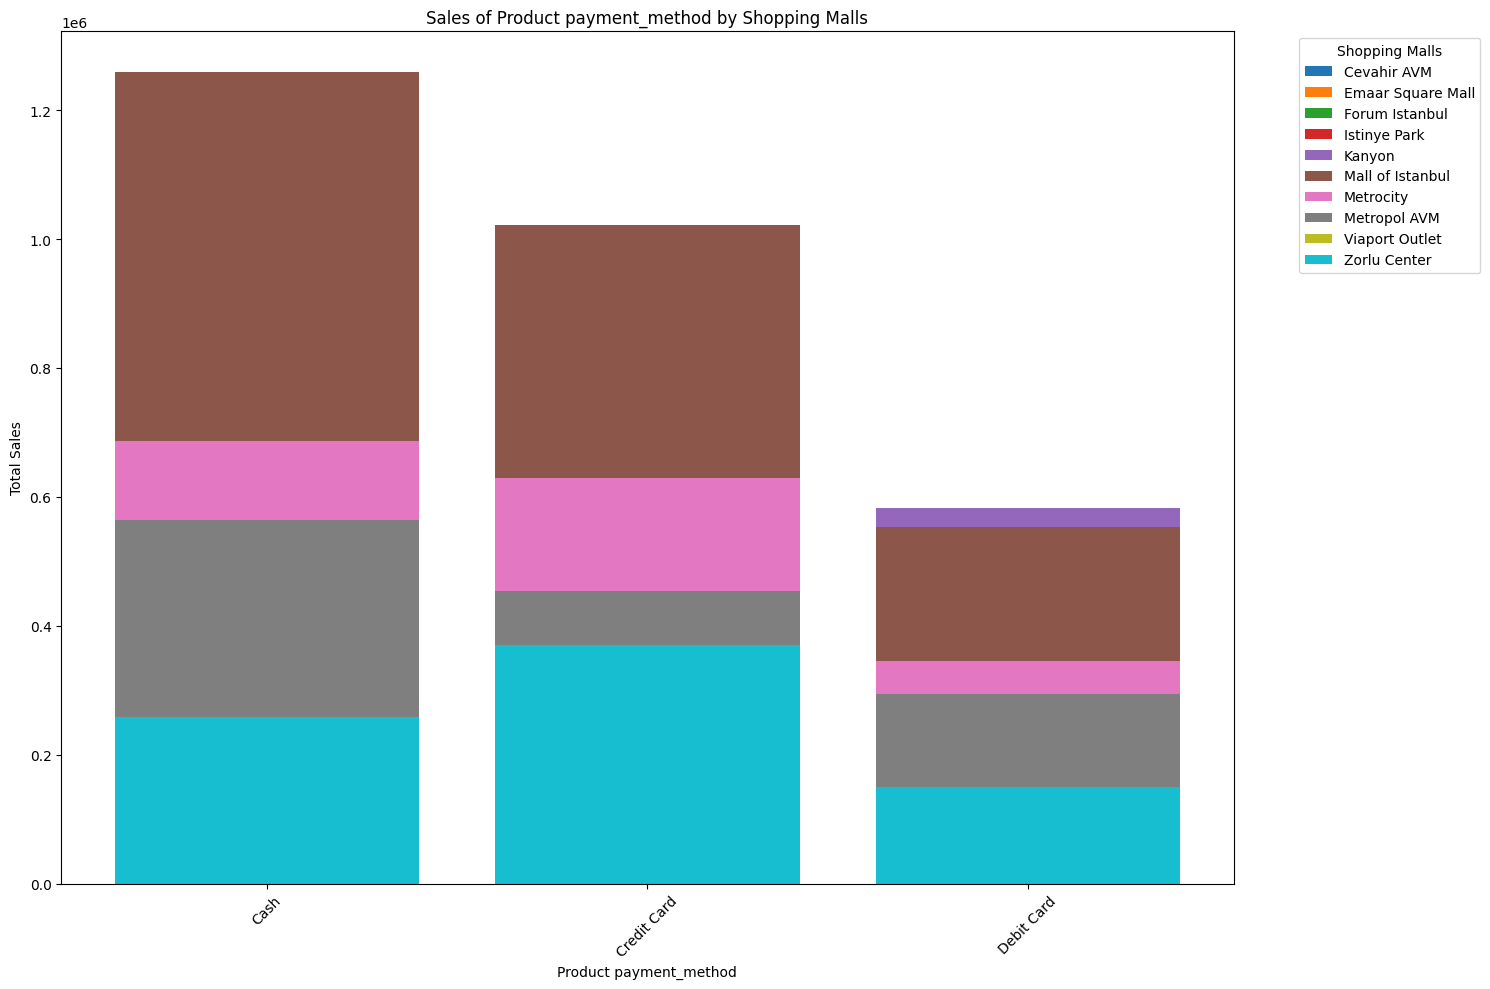

In [15]:
# Group by Shopping Mall and ProductPaymentMethod, sum SalesTotal
sales_by_country_category = unified_df.groupby(['shopping_mall', 'payment_method'])['SalesTotal'].sum().reset_index()

# Plotting
plt.figure(figsize=(15, 10))
for shopmall in sales_by_country_category['shopping_mall'].unique():
    data_country = sales_by_country_category[sales_by_country_category['shopping_mall'] == shopmall]
    plt.bar(data_country['payment_method'], data_country['SalesTotal'], label=shopmall)

plt.xlabel('Product payment_method')
plt.ylabel('Total Sales')
plt.title('Sales of Product payment_method by Shopping Malls')
plt.xticks(rotation=45)
plt.legend(title='Shopping Malls', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [16]:
# Assuming sales_by_country_category is already defined and contains the necessary data
sales_by_country_category = unified_df.groupby(['category', 'shopping_mall'])['SalesTotal'].sum().reset_index()
# Plotting with Plotly
fig = px.bar(sales_by_country_category, x='category', y='SalesTotal', color='shopping_mall',
             title='Sales of Product Categories by Shopping Malls',
             labels={'category': 'Product Description', 'SalesTotal': 'Total Sales', 'shopping_mall': 'Shopping Mall'},
             barmode='group')

# Update layout for vertical legend and increased plot size
fig.update_layout(
    xaxis_tickangle=-90,  # Rotate x-axis labels for better readability
    xaxis_title="Categories",     # No need for x-axis title in this case
    yaxis_title='Total Sales',  # Y-axis title
    legend_title='Shopping Mall',     # Legend title
    legend=dict(
        orientation='v',    # Vertical legend
        xanchor='left',     # Anchor the legend to the left
        x=1.02,             # Adjust the legend position to the right of the plot
        y=1.0               # Center the legend vertically
    ),
    margin=dict(l=50, r=50, t=80, b=50),  # Adjust margins to increase plot size
    height=600,  # Set the height of the plot
)

# Show plot
fig.show()

In [17]:
# Aggregate sales by shopping mall and category
sales_by_mall_category = unified_df.groupby(['shopping_mall', 'category'], as_index=False)['SalesTotal'].sum()

# Initialize Dash app
app = dash.Dash(__name__)

# Define app layout
app.layout = html.Div([
    html.H1("Sales of Product Categories by Shopping Mall"),

    dcc.Checklist(
        id='category-selector',
        options=[{'label': cat, 'value': cat} for cat in sales_by_mall_category['category'].unique()],
        value=sales_by_mall_category['category'].unique().tolist(),
        labelStyle={'display': 'inline-block'}
    ),

    dcc.Graph(id='bar-chart')
])

# Define callback to update bar chart based on category selection
@app.callback(
    Output('bar-chart', 'figure'),
    [Input('category-selector', 'value')]
)
def update_bar_chart(selected_categories):
    filtered_df = sales_by_mall_category[sales_by_mall_category['category'].isin(selected_categories)]

    # Create bar chart
    fig = px.bar(filtered_df, x='shopping_mall', y='SalesTotal', color='category',
                 title='Total Sales by Shopping Mall and Category',
                 labels={'SalesTotal': 'Total Sales', 'shopping_mall': 'Shopping Mall', 'category': 'Category'},
                 barmode='group')

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>